In [2]:
import torch
import numpy as np
import torchvision as tv
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
BATCH_SIZE=200

In [4]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


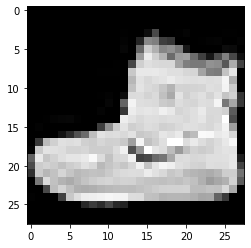

In [5]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [6]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  

print(dev)

cuda:0


In [11]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 16, kernel_size=4),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(16, 32, kernel_size=3),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(800, 400),
    torch.nn.Dropout2d(0.25),
    torch.nn.ReLU(),
    # torch.nn.Linear(400, 100),
    torch.nn.Linear(400, 10)
)

model = model.to(dev)
model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=800, out_features=400, bias=True)
  (8): Dropout2d(p=0.25, inplace=False)
  (9): ReLU()
  (10): Linear(in_features=400, out_features=10, bias=True)
)

In [12]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.003)
num_epochs = 15
#trainer = torch.optim.Adam(model.parameters(), lr=0.003)
#num_epochs = 10

In [13]:
for ep in range(num_epochs):
    train_iters, train_passed = 0, 0
    train_loss, train_acc = 0, 0
    
    model.train()
    for X, y in train:
        X, y = X.to(dev), y.to(dev)
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    model.eval()
    for X, y in test:
        X, y = X.to(dev), y.to(dev)
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.5490541810790698, train_acc: 0.79845, test_loss: 0.39020893394947054, test_acc: 0.8569
ep: 1, train_loss: 0.3481403115888437, train_acc: 0.8720166666666667, test_loss: 0.3435404574871063, test_acc: 0.8757
ep: 2, train_loss: 0.30051640296975773, train_acc: 0.8884166666666666, test_loss: 0.30190940737724303, test_acc: 0.8898
ep: 3, train_loss: 0.26925453464190163, train_acc: 0.8996666666666666, test_loss: 0.3074581664800644, test_acc: 0.8904
ep: 4, train_loss: 0.2457002259294192, train_acc: 0.9082833333333333, test_loss: 0.28608457148075106, test_acc: 0.8958
ep: 5, train_loss: 0.22766368821263314, train_acc: 0.9146666666666666, test_loss: 0.27640580892562866, test_acc: 0.9001
ep: 6, train_loss: 0.21039208548764388, train_acc: 0.9207166666666666, test_loss: 0.27513244926929475, test_acc: 0.9001
ep: 7, train_loss: 0.19890602951248487, train_acc: 0.9248, test_loss: 0.273755863904953, test_acc: 0.9026
ep: 8, train_loss: 0.18642078464229903, train_acc: 0.9290166666666667,